# DBSCAN

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '6'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("./cluster_blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

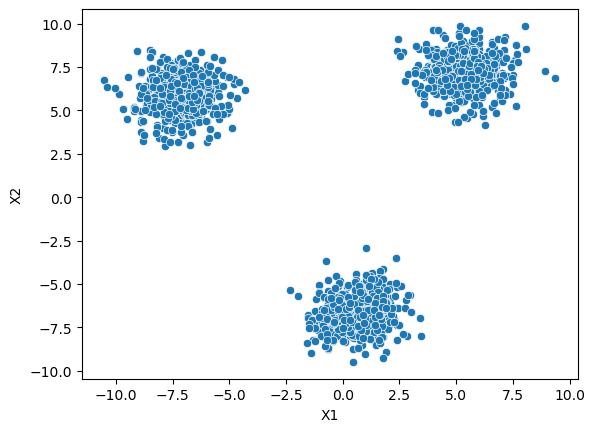

In [4]:
sns.scatterplot(data=blobs,x="X1",y="X2")

In [8]:
moons = pd.read_csv("./cluster_moons.csv")
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

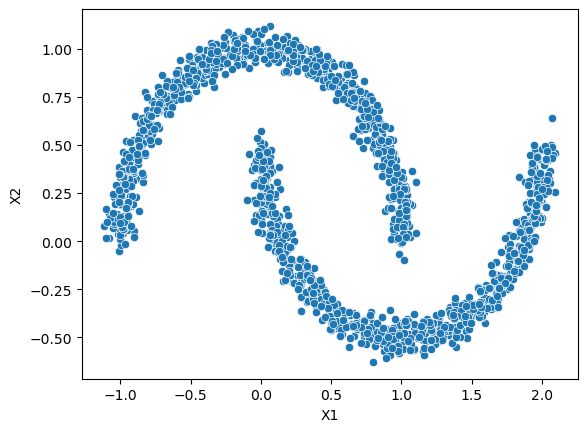

In [9]:
sns.scatterplot(data=moons,x="X1",y="X2")

In [10]:
circles = pd.read_csv("./cluster_circles.csv")
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

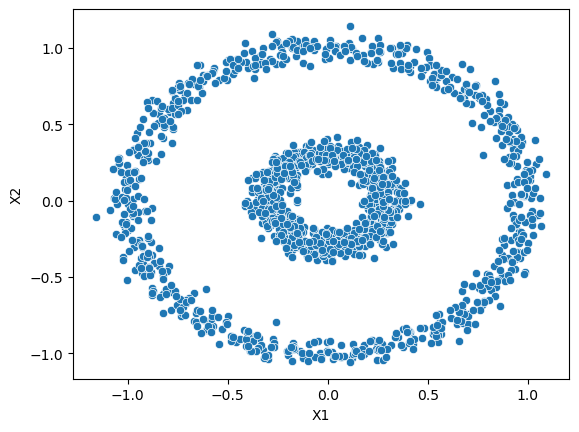

In [11]:
sns.scatterplot(data=circles,x='X1',y='X2')

## 用於顯示群集的散佈圖

In [13]:
def display_mode(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x="X1",y="X2",hue=labels,palette="Set1")


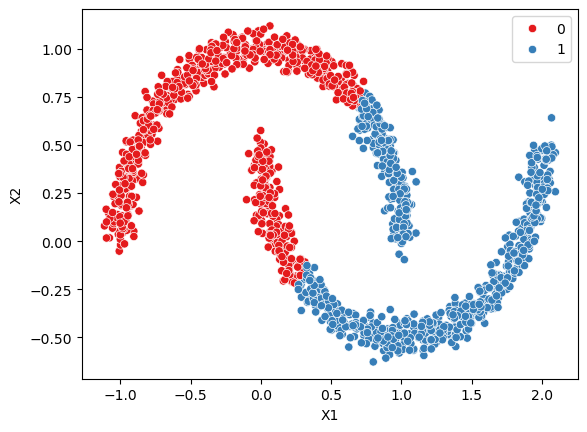

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
display_mode(model,moons)

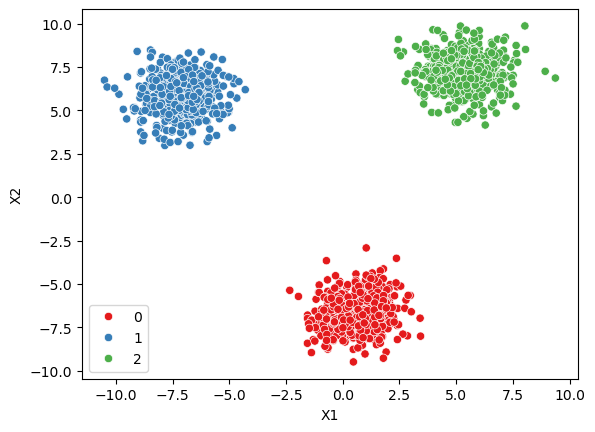

In [15]:
model = KMeans(n_clusters=3)
display_mode(model,blobs)

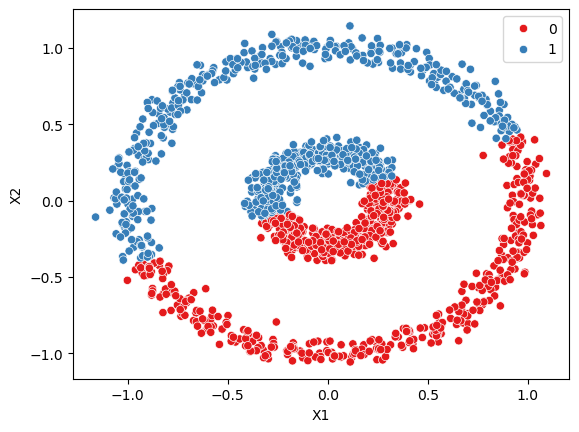

In [16]:
model = KMeans(n_clusters=2)
display_mode(model,circles)

## DBSCAN 

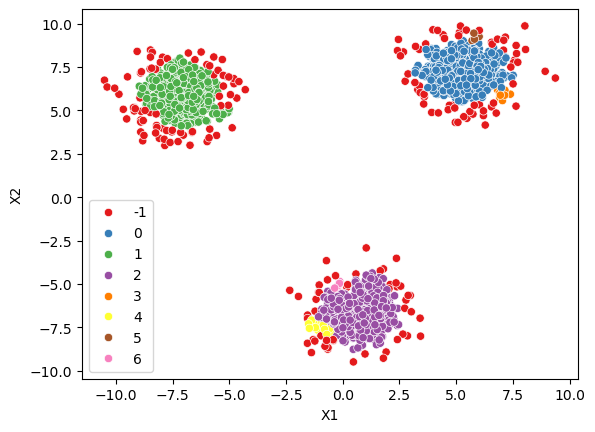

In [22]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.3)
display_mode(model,blobs)

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score #輪廓係數
import numpy as np
silhouette_scores = []
eps_values = np.arange(0.1, 3.0, 0.1)
for eps in eps_values:
    testModel = DBSCAN(eps=eps)
    y_km = testModel.fit_predict(blobs)
    if len(set(y_km)) > 1:
        silhouette_scores.append(silhouette_score(blobs,y_km))
    else:
        silhouette_scores.append(-1)#無效點他是雜訊   
baset_index = np.argmax(silhouette_scores)
bast_eps = eps_values[baset_index]
bast_score = silhouette_scores[baset_index]
print(f"bast_eps:{bast_eps} bast_score:{bast_score}")

bast_eps:1.5000000000000002 bast_score:0.8625486425630479


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score #輪廓係數
import numpy as np
def test_bast_eps(data):
    silhouette_scores = []
    eps_values = np.arange(0.1, 3.0, 0.1)
    for eps in eps_values:
        testModel = DBSCAN(eps=eps)
        y_km = testModel.fit_predict(data)
        if len(set(y_km)) > 1:
            silhouette_scores.append(silhouette_score(data,y_km))
        else:
            silhouette_scores.append(-1)#無效點他是雜訊   
    baset_index = np.argmax(silhouette_scores)
    bast_eps = eps_values[baset_index]
    bast_score = silhouette_scores[baset_index]
    print(f"bast_eps:{bast_eps} bast_score:{bast_score}")

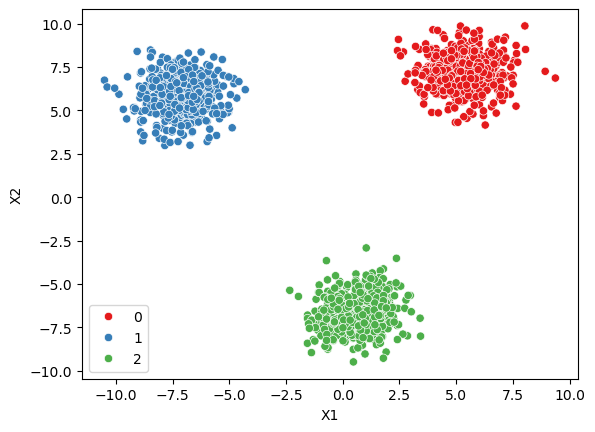

In [24]:
model = DBSCAN(eps=1.5)
display_mode(model,blobs)

bast_eps:0.2 bast_score:0.33344160813873897


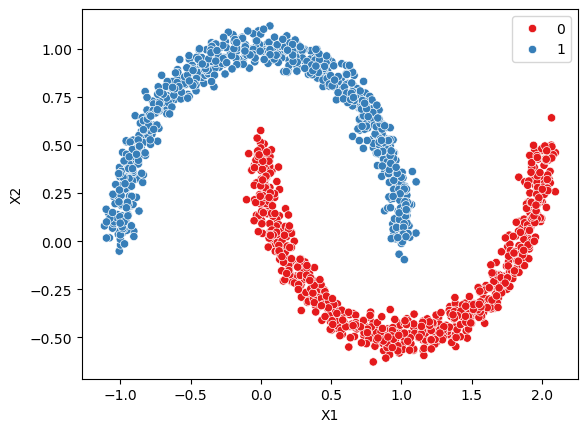

In [28]:
test_bast_eps(moons)
model = DBSCAN(eps=0.2)
display_mode(model,moons)

In [29]:
test_bast_eps(circles)


bast_eps:0.2 bast_score:0.20829174427109967


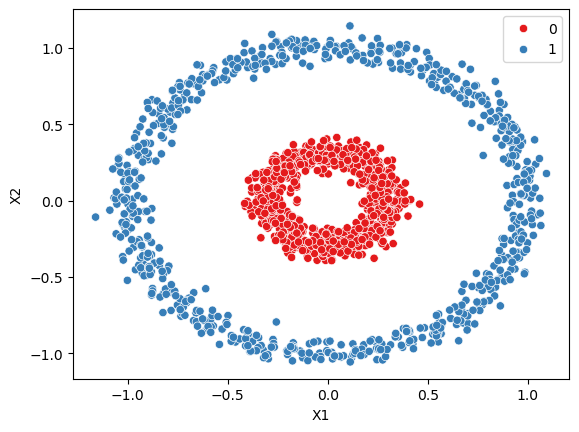

In [30]:
model = DBSCAN(eps=0.2)
display_mode(model,circles)

# 自我訓練(Self-training)測試

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

In [44]:
X,y = datasets.load_iris(return_X_y=True)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## 設定 約50% 資料為沒有標註(-1)

In [36]:
rng = np.random.RandomState(42)
y_rand = rng.rand(y_train.shape[0])#均勻分布亂數
y_rand

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

In [43]:
y_50 = np.copy(y_train)
y_50[y_rand < 0.5] = -1
len(y_50[y_50 == -1])
len(y_train)

120

In [42]:
## 模型訓練
# kernel="rbf" gamma=0.5
base_class = SVC(kernel="rbf",gamma=0.5)
base_class.fit(X_train,y_50)
base_class.score(X_test,y_test)

0.3333333333333333

In [40]:
base_class = SVC(kernel = "rbf", gamma = 0.5)
base_class.fit(X_train, y_50)
base_class.score(X_test, y_test)

0.3333333333333333

In [46]:
base_class2 = SVC(kernel="rbf",gamma=0.5,probability=True)
clf = SelfTrainingClassifier(base_class2).fit(X_train,y_50)
clf.score(X_test,y_test)

1.0

# 標註傳播(Label propagation)測試

In [47]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation

In [48]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                            random_state=1, stratify=y)

In [50]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(
          X_train, y_train, test_size=0.5, random_state=1, stratify=y_train)
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))#將分割的X合併
nolabel = [-1 for _ in range(len(y_test_unlab))]#將分割的y合併0.5給-1
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed.shape

(500,)

## LogisticRegression 模型訓練與評估 基準點

In [51]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train_mixed,y_train_mixed)
clf2.score(X_test,y_test)

0.23

# LabelSpreading 測試

In [52]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading

In [53]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=2)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                            random_state=1, stratify=y)

In [55]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(
          X_train, y_train, test_size=0.5, random_state=1, stratify=y_train)
##在分割50筆資料給-1 標記為無標籤
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))
nolabel = [-1 for _ in range(len(y_test_unlab))]##在分割50筆資料給-1
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed.shape

(500,)

## LabelSpreading 模型訓練與評估

In [56]:
from sklearn.semi_supervised import LabelSpreading
clf = LabelSpreading()
clf.fit(X_train_mixed, y_train_mixed)
clf.score(X_test, y_test)

0.866

# 影像壓縮(Image Compression)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

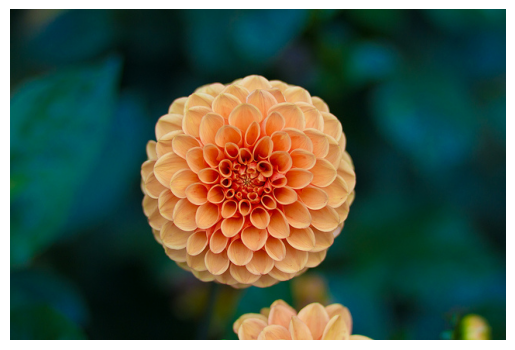

In [59]:
flower = load_sample_image('flower.jpg')
plt.axis('off')
plt.imshow(flower)

## 正規化、取得圖片寬高及顏色維度、將寬高轉為一維

In [60]:
flower = np.array(flower,dtype=np.float64)/255
w,h,d = tuple(flower.shape)
# 將寬高轉為一維
image_array = np.reshape(flower, (w * h, d))
w, h, d,image_array.shape

(427, 640, 3, (273280, 3))

## 模型訓練及預測

In [61]:
# 隨機抽樣1000個像素
image_sample = shuffle(image_array, random_state=42)[:1000]

# K-Means模型訓練， 設定64個集群
kmeans = KMeans(n_clusters=64, random_state=42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [62]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            # 以質心取代原圖像顏色
            #cluster_centers 對映到64個顏色 我目前的色塊對應到的是哪個色系
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

## 比較原圖與減色後的圖片

w: 427 h: 640 labels: [51 12 51 ... 27 27 27]


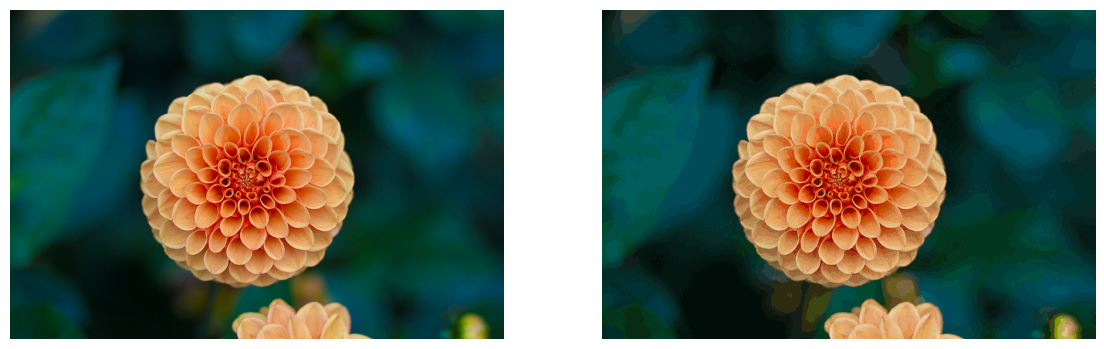

In [67]:
plt.figure(figsize=(14,7))

# 原圖
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(flower)

plt.subplot(1, 2, 2)
plt.axis('off')
print("w:",w,"h:",h,"labels:",labels)
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))